In [1]:
# Import important liabraries
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [2]:
df = pd.read_csv('twitter_disaster.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [4]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [5]:
df['target'].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

### Visualize the distribution of classes (disaster vs. non-disaster tweets)

<Axes: xlabel='target'>

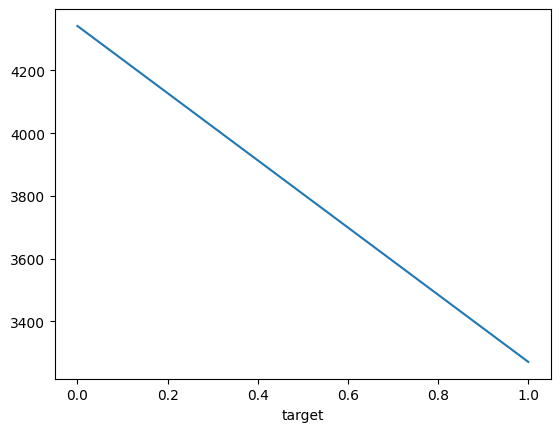

In [6]:
df['target'].value_counts().plot()

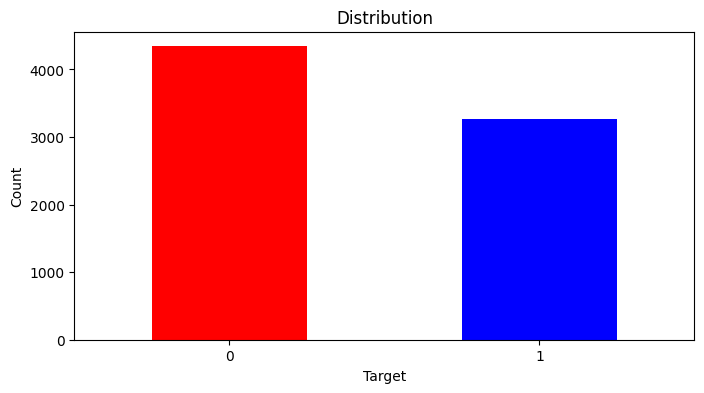

In [7]:
plt.figure(figsize=(8,4))
df['target'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Count of non-disaster tweets is higher than the disaster tweets**

### Analyze the frequency of keywords and phrases associated with disaster tweets

In [8]:
disaster_text = df[df['target'] == 1]['text']
non_disaster_text = df[df['target'] == 0]['text']

In [9]:
disaster_text.value_counts()

text
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...        10
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_     6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives                                                                                  5
VIDEO: 'We're picking up bodies from water': Rescuers are searching for hundreds of migrants in the Mediterranean after a boat carryi...         4
.POTUS #StrategicPatience is a strategy for #Genocide; refugees; IDP Internally displaced people; horror; etc. https://t.co/rqWuoy1fm4           3
                                                                                                                                                ..
Philippines Must Protect Internally Displaced Persons Warns UN Expert - The Diplomat http://t.co/V0yRfH9DKc      

In [10]:
disaster_text.shape

(3271,)

In [11]:
non_disaster_text.value_counts()

text
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.'             4
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam    4
@TinyJecht Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.                            3
Beware of your temper and a loose tongue! These two dangerous weapons combined can lead a person to the Hellfire #islam!       3
@spinningbot Are you another Stand-user? If you are I will have to detonate you with my Killer Queen.                          3
                                                                                                                              ..
Demolished My Personal Best  http://t.co/ImULLBvUEd                                                                            1
5000 year old ring fort to be demolished http://t.co/1PxpoqKTjo                             

In [12]:
non_disaster_text.shape

(4342,)

In [13]:
# Download NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization
disaster_tokens = [word.lower() for text in disaster_text for word in word_tokenize(text)]

# Remove stopswords and puncuation
stop_words = set(stopwords.words('english'))
disaster_tokens = [word for word in disaster_tokens if word.isalnum() and word not in stop_words]

# Count keywords frequencies
keyword_counts = Counter(disaster_tokens)

# Display the most common keywords
print('Top 20 Keywords')
for keyword, count in keyword_counts.most_common(20):
    print(f'{keyword}: {count}')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 20 Keywords
http: 2380
fire: 177
news: 140
amp: 135
https: 133
via: 121
disaster: 119
california: 111
police: 107
people: 104
suicide: 104
killed: 93
like: 93
storm: 87
hiroshima: 87
crash: 85
fires: 84
families: 81
train: 79
2: 76
